In [20]:
#adding libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [21]:
#accessing the dataset file stored in the Google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")
!ls
#Reading the dataset file
my_dataset = pd.read_csv('Fatality.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Atrificial nural network.ipynb'	  'Untitled0 (1).ipynb'   Untitled2.ipynb
'Copy of Atrificial nural network.ipynb'   Untitled0.ipynb	 'Untitled (3)'
 Fatality.csv				  'Untitled (1)'	  Untitled3.ipynb
 penguins_size.csv			  'Untitled1 (1).ipynb'  'Untitled (4)'
'PR2_Demo (1).ipynb'			   Untitled1.ipynb
 Untitled				  'Untitled (2)'
rownames      int64
state         int64
year          int64
mrall       float64
beertax     float64
mlda        float64
jaild        object
comserd      object
vmiles      float64
unrate      float64
perinc      float64
dtype: object


In [22]:
#Since categorical attributes are specified as "object", their type is changed to "category"
my_dataset["jaild"] = my_dataset["jaild"].astype('category')
my_dataset["comserd"] = my_dataset["comserd"].astype('category')

#New columns are created for categorical attributes and their values are converted to numeric values
my_dataset["jaild_cat"] = my_dataset["jaild"].cat.codes
my_dataset["comser_cat"] = my_dataset["comserd"].cat.codes

#Representing datatypes of the dataset columns
print(my_dataset.dtypes)

rownames         int64
state            int64
year             int64
mrall          float64
beertax        float64
mlda           float64
jaild         category
comserd       category
vmiles         float64
unrate         float64
perinc         float64
jaild_cat         int8
comser_cat        int8
dtype: object


In [23]:
my_reduced_dataset = my_dataset[["vmiles","mrall","beertax","mlda","rownames","state","year","unrate","perinc","jaild_cat","comser_cat"]]
#Dataset data are displayed
print(my_reduced_dataset.describe())
print(my_reduced_dataset.info())

           vmiles       mrall     beertax        mlda    rownames       state  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     7.890754    2.040444    0.513256   20.455625  168.500000   30.187500   
std      1.475659    0.570194    0.477844    0.899025   97.139076   15.309853   
min      4.576346    0.821210    0.043311   18.000000    1.000000    1.000000   
25%      7.182539    1.623710    0.208849   20.000000   84.750000   18.750000   
50%      7.796219    1.955955    0.352589   21.000000  168.500000   30.500000   
75%      8.504015    2.417888    0.651573   21.000000  252.250000   42.500000   
max     26.148271    4.217840    2.720764   21.000000  336.000000   56.000000   

              year      unrate        perinc   jaild_cat  comser_cat  
count   336.000000  336.000000    336.000000  336.000000  336.000000  
mean   1985.000000    7.346726  13880.184533    0.279762    0.184524  
std       2.002983    2.533405   2253.046291    0.449552 

In [24]:
#Replacing missing values with average values
my_working_dataset=my_reduced_dataset.copy()
my_working_dataset['vmiles']=my_working_dataset['vmiles'].fillna(my_working_dataset['vmiles'].mean())
my_working_dataset['mrall']=my_working_dataset['mrall'].fillna(my_working_dataset['mrall'].mean())
my_working_dataset['beertax']=my_working_dataset['beertax'].fillna(my_working_dataset['beertax'].mean())
my_working_dataset['mlda']=my_working_dataset['mlda'].fillna(my_working_dataset['mlda'].mean())
my_working_dataset['rownames']=my_working_dataset['rownames'].fillna(my_working_dataset['rownames'].mean())
my_working_dataset['state']=my_working_dataset['state'].fillna(my_working_dataset['state'].mean())
my_working_dataset['year']=my_working_dataset['year'].fillna(my_working_dataset['year'].mean())
my_working_dataset['unrate']=my_working_dataset['unrate'].fillna(my_working_dataset['unrate'].mean())
my_working_dataset['perinc']=my_working_dataset['rownames'].fillna(my_working_dataset['rownames'].mean())


#Dataset data are displayed
print(my_working_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vmiles      336 non-null    float64
 1   mrall       336 non-null    float64
 2   beertax     336 non-null    float64
 3   mlda        336 non-null    float64
 4   rownames    336 non-null    int64  
 5   state       336 non-null    int64  
 6   year        336 non-null    int64  
 7   unrate      336 non-null    float64
 8   perinc      336 non-null    int64  
 9   jaild_cat   336 non-null    int8   
 10  comser_cat  336 non-null    int8   
dtypes: float64(5), int64(4), int8(2)
memory usage: 24.4 KB
None


In [25]:
#For attributes of categorical type, the values are checked against possible values
print(my_working_dataset['jaild_cat'].value_counts())
print(my_working_dataset['comser_cat'].value_counts())

jaild_cat
0    242
1     94
Name: count, dtype: int64
comser_cat
0    274
1     62
Name: count, dtype: int64


In [26]:
#Data normalisation is applied for four attributes to make the data more consistent
my_working_dataset['vmiles']=(my_working_dataset['vmiles']-my_working_dataset['vmiles'].min())/(my_working_dataset['vmiles'].max()-my_working_dataset['vmiles'].min())
my_working_dataset['mrall']=(my_working_dataset['mrall']-my_working_dataset['mrall'].min())/(my_working_dataset['mrall'].max()-my_working_dataset['mrall'].min())
my_working_dataset['beertax']=(my_working_dataset['beertax']-my_working_dataset['beertax'].min())/(my_working_dataset['beertax'].max()-my_working_dataset['beertax'].min())
my_working_dataset['rownames']=(my_working_dataset['rownames']-my_working_dataset['rownames'].min())/(my_working_dataset['rownames'].max()-my_working_dataset['rownames'].min())
my_working_dataset['state']=(my_working_dataset['state']-my_working_dataset['state'].min())/(my_working_dataset['state'].max()-my_working_dataset['state'].min())
my_working_dataset['unrate']=(my_working_dataset['unrate']-my_working_dataset['unrate'].min())/(my_working_dataset['unrate'].max()-my_working_dataset['unrate'].min())
my_working_dataset['perinc']=(my_working_dataset['perinc']-my_working_dataset['perinc'].min())/(my_working_dataset['perinc'].max()-my_working_dataset['perinc'].min())
my_working_dataset['year']=(my_working_dataset['year']-my_working_dataset['year'].min())/(my_working_dataset['year'].max()-my_working_dataset['year'].min())
print(my_working_dataset.head(10))
print(my_working_dataset.describe())

     vmiles     mrall   beertax   mlda  rownames     state      year  \
0  0.123194  0.384837  0.558766  19.00  0.000000  0.000000  0.000000   
1  0.151122  0.449643  0.651993  19.00  0.002985  0.000000  0.166667   
2  0.170900  0.446095  0.624091  19.00  0.005970  0.000000  0.333333   
3  0.192406  0.404009  0.601031  19.67  0.008955  0.000000  0.500000   
4  0.202880  0.544048  0.585107  21.00  0.011940  0.000000  0.666667   
5  0.212775  0.558607  0.566467  21.00  0.014925  0.000000  0.833333   
6  0.236325  0.492459  0.544597  21.00  0.017910  0.000000  1.000000   
7  0.103552  0.493998  0.064048  19.00  0.020896  0.054545  0.000000   
8  0.093230  0.425766  0.060920  19.00  0.023881  0.054545  0.166667   
9  0.098907  0.591048  0.094639  19.00  0.026866  0.054545  0.333333   

     unrate    perinc  jaild_cat  comser_cat  
0  0.769231  0.000000          0           0  
1  0.724359  0.002985          0           0  
2  0.557692  0.005970          0           0  
3  0.416667  0.0089

**ARTIFIAL NN**

In [27]:
clustering_dataset = my_working_dataset[['comser_cat','mlda','vmiles','year']]
from sklearn.model_selection import train_test_split
targets = my_working_dataset['jaild_cat']
training_proportion = 0.7
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

In [28]:
from sklearn.neural_network import MLPClassifier
my_ann_model = MLPClassifier(hidden_layer_sizes=(500,500), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 1)
my_ann_model.fit(X_train, y_train)

Iteration 1, loss = 2.36131867
Iteration 2, loss = 3.51196380
Iteration 3, loss = 0.75355315
Iteration 4, loss = 0.72236328
Iteration 5, loss = 0.61805579
Iteration 6, loss = 0.59990943
Iteration 7, loss = 0.59832005
Iteration 8, loss = 0.59994888
Iteration 9, loss = 0.59912865
Iteration 10, loss = 0.59894628
Iteration 11, loss = 0.59837325
Iteration 12, loss = 0.59846152
Iteration 13, loss = 0.59847286
Iteration 14, loss = 0.59842391
Iteration 15, loss = 0.59824399
Iteration 16, loss = 0.59810513
Iteration 17, loss = 0.59804869
Iteration 18, loss = 0.59807556
Iteration 19, loss = 0.59807983
Iteration 20, loss = 0.59808008
Iteration 21, loss = 0.59821368
Iteration 22, loss = 0.59838738
Iteration 23, loss = 0.59886264
Iteration 24, loss = 0.59925822
Iteration 25, loss = 0.59974659
Iteration 26, loss = 0.60017057
Iteration 27, loss = 0.60016186
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(500, 500),
              learning_rate_init=0.2, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        74
           1       0.00      0.00      0.00        27

    accuracy                           0.73       101
   macro avg       0.37      0.50      0.42       101
weighted avg       0.54      0.73      0.62       101



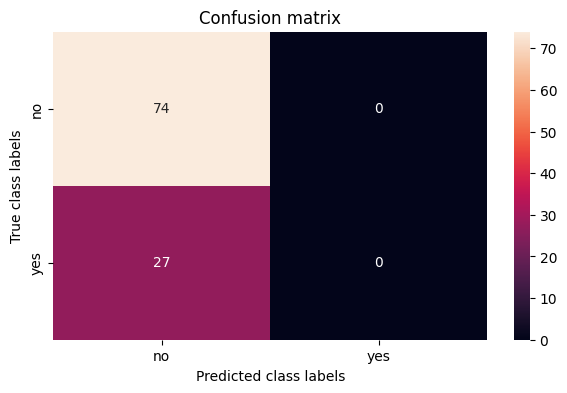

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
y_predictions = my_ann_model.predict(X_test)
print(classification_report(y_test,y_predictions, zero_division=0))
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['jaild'].unique());
ax.yaxis.set_ticklabels(my_dataset['jaild'].unique());

In [30]:
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(20), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.5, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=20,
              learning_rate_init=0.5, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        74
           1       0.00      0.00      0.00        27

    accuracy                           0.73       101
   macro avg       0.37      0.50      0.42       101
weighted avg       0.54      0.73      0.62       101



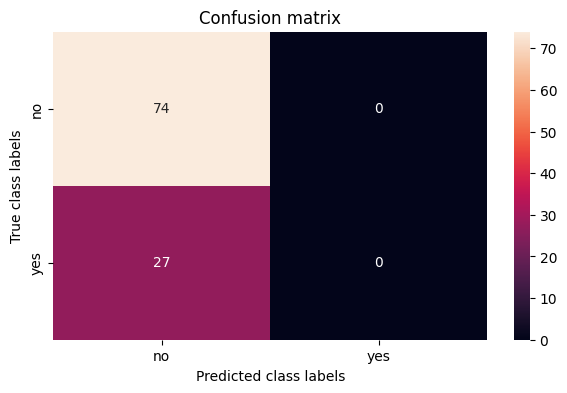

In [31]:
y_predictions_2 = my_ann_model_2.predict(X_test)
print(classification_report(y_test,y_predictions_2, zero_division=0))
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['jaild'].unique());
ax.yaxis.set_ticklabels(my_dataset['jaild'].unique());